In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [4]:
data = pd.read_csv('RRCA_baseflow.csv')
data.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [6]:
print(data.corr())

                        Date  Segment_id         x         y  \
Date                1.000000   -0.136997  0.070091 -0.011757   
Segment_id         -0.136997    1.000000  0.237616  0.056727   
x                   0.070091    0.237616  1.000000  0.090145   
y                  -0.011757    0.056727  0.090145  1.000000   
Evapotranspiration -0.031216   -0.050775 -0.164104  0.234267   
Precipitation      -0.017770   -0.051083 -0.014881  0.423279   
Irrigation_pumping -0.202522    0.065033  0.120382 -0.049067   
Observed           -0.234023    0.337919  0.089616  0.101751   

                    Evapotranspiration  Precipitation  Irrigation_pumping  \
Date                         -0.031216      -0.017770           -0.202522   
Segment_id                   -0.050775      -0.051083            0.065033   
x                            -0.164104      -0.014881            0.120382   
y                             0.234267       0.423279           -0.049067   
Evapotranspiration            1.000000

In [12]:
data_target = data.iloc[:,-1].values
data_ip = data.loc[:, data.columns != 'Observed'].values

In [14]:
X,y = scale(data_ip), data_target

In [15]:
missing_values = X == np.NaN
X[missing_values == True]

array([], dtype=float64)

In [19]:
LinReg = LinearRegression(normalize = True)
LinReg.fit(X,y)
print(LinReg.score(X,y))

0.2356121961555283


In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

import seaborn as sns

In [3]:
data = pd.read_csv('RRCA_baseflow.csv', index_col=0)
data.head()

,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
Date,,,,,,,
710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [4]:
data.shape

(15591, 7)

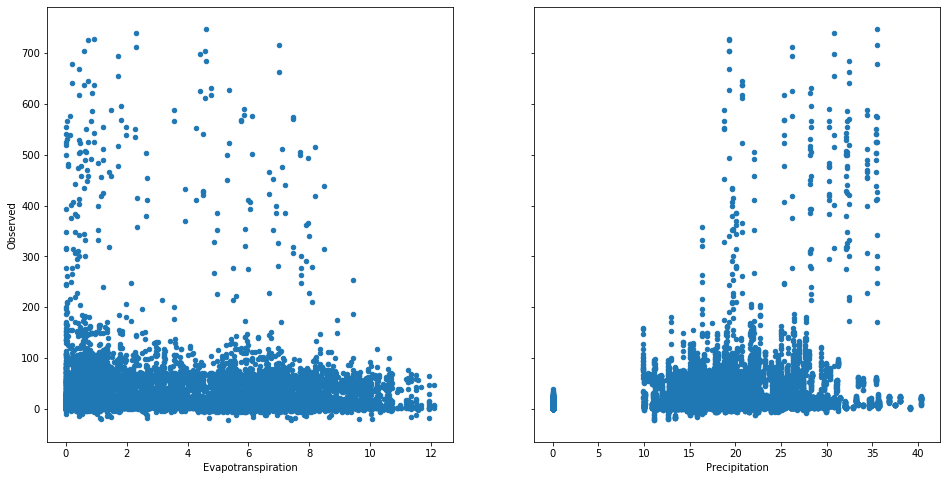

In [21]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
# data.plot(kind='scatter', x='Date', y='Observed', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1])

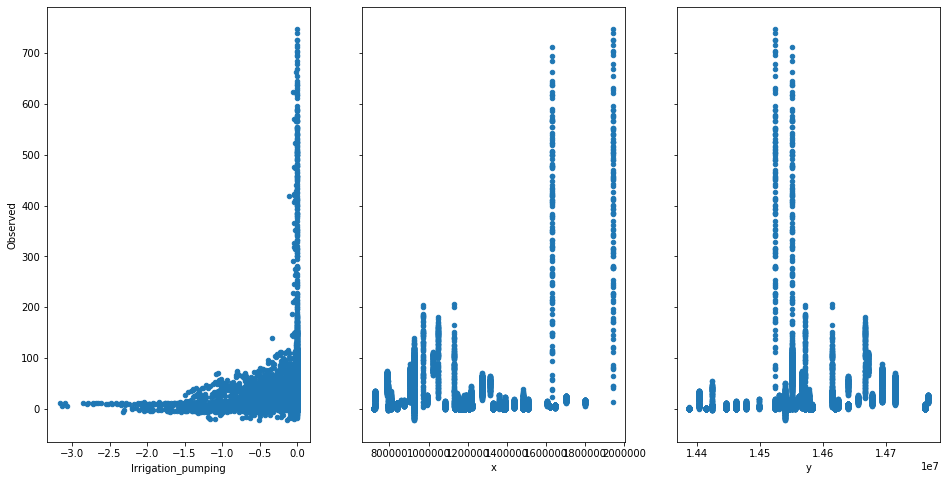

In [16]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='x', y='Observed', ax=axs[1])
data.plot(kind='scatter', x='y', y='Observed', ax=axs[2])

In [22]:
# create X and y
feature_cols = ['Irrigation_pumping']
X = data[feature_cols]
y = data.Observed

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

25.007945147628565
[11.25744056]
